<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Arabic Sentiment Reviews</p></b></h1>

### Tabel of Contents:

* [Import Libraries](#1)
* [Load Dataset](#2)
* [Preprocessing](#3)
* [Sequences Model](#4)
* [Evaluation](#5)
* [SentimentIntensityAnalyzer](#7)
* [Like this? Upvote and comment! 🌊 End](#6)

**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
from tqdm import tqdm
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


**<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
dataset = pd.read_csv('/kaggle/input/330k-arabic-sentiment-reviews/arabic_sentiment_reviews.csv')
dataset.head()

,label,content
0,1,النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دا...
1,1,منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من الن...
2,1,جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتقاط...
3,0,واهية للغاية: flimsyif للغاية ، فأنت تشتريه ، ...
4,1,Pop for Girls and Girly Boys ، والأشخاص الذين ...


In [3]:
dataset.shape

(330000, 2)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330000 entries, 0 to 329999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    330000 non-null  int64 
 1   content  330000 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.0+ MB


In [5]:
dataset.label.value_counts()

label
1    166853
0    163147
Name: count, dtype: int64

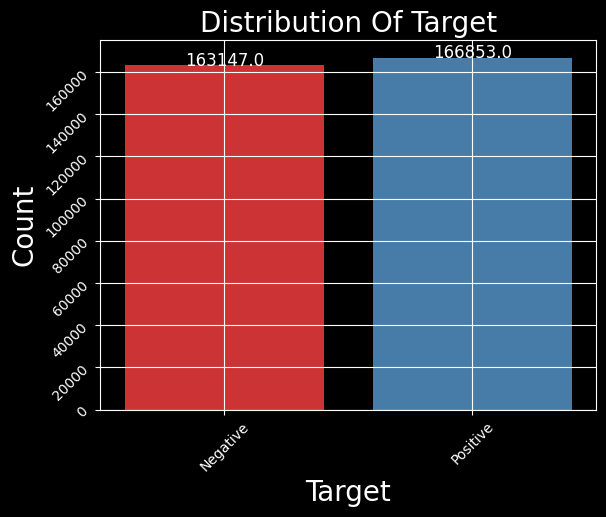

In [6]:
plt.style.use('dark_background')
ax = sns.countplot(x='label', data=dataset, palette='Set1')
plt.title('Distribution Of Target', fontsize=20)
plt.xlabel('Target', fontsize=20)
plt.ylabel('Count', fontsize=20)
ax.set_xticklabels(['Negative','Positive'])
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12)
plt.show()

**<a id="3"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Preprocessing</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [7]:
def clean_arabic_text(text):
    # Remove non-Arabic alphabetic characters and extra whitespace
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)  # Keeps only Arabic characters and spaces
    # Convert multiple whitespace characters to a single space
    text = re.sub(r'\s+', ' ', text)
    # Remove leading and trailing spaces
    text = text.strip()
    return text

In [8]:
dataset.label[50],dataset.content[50]

(1,
 'آمين!: أوافق على أن الحلقات التجريبية يجب تضمينها في مجموعة مربع الموسم الأول ، لا يتم تقديمها هنا بمفردها.كما أنها باهظة الثمن بعض الشيء.حتى Farscape أعطاك حلقتين لعشرة دولارات عندما بدأوا في إطلاق سراح DVD والشريط.ومع ذلك ، قد يكون تاريخ الإصدار قليلاً من أدنى فكرة عن قرص DVD ثنائي القاع.على الأرجح أنهم يحاولون صقل الأعمال التجارية للعرض قبل العرض الصيفي في السنة الثانية. كما هو الحال بالنسبة للعرض ، أعجبتني ككل.منحت ، من الواضح أنها استنساخ ستارغيت.الشخصيات هي الشخصيات التي رأيناها جميعًا من قبل ، وعندما تقارنها بالأصول الأصلية ، فإنها تأتي في المرتبة الثانية.لكن لإعادة صياغة حلقة Stargate SG-1 ، كنت سأستمع إلى رودني حتى لو كان كل ما يفعله هو قراءة دفتر الهاتف ".إنه ممتع ، ما زلت أشتري هذا ، لكن غير مستعملة فقط.')

In [9]:
dataset.label[50],clean_arabic_text(dataset.content[50])

(1,
 'آمين أوافق على أن الحلقات التجريبية يجب تضمينها في مجموعة مربع الموسم الأول ، لا يتم تقديمها هنا بمفردهاكما أنها باهظة الثمن بعض الشيءحتى أعطاك حلقتين لعشرة دولارات عندما بدأوا في إطلاق سراح والشريطومع ذلك ، قد يكون تاريخ الإصدار قليلاً من أدنى فكرة عن قرص ثنائي القاععلى الأرجح أنهم يحاولون صقل الأعمال التجارية للعرض قبل العرض الصيفي في السنة الثانية كما هو الحال بالنسبة للعرض ، أعجبتني ككلمنحت ، من الواضح أنها استنساخ ستارغيتالشخصيات هي الشخصيات التي رأيناها جميعًا من قبل ، وعندما تقارنها بالأصول الأصلية ، فإنها تأتي في المرتبة الثانيةلكن لإعادة صياغة حلقة ، كنت سأستمع إلى رودني حتى لو كان كل ما يفعله هو قراءة دفتر الهاتف إنه ممتع ، ما زلت أشتري هذا ، لكن غير مستعملة فقط')

In [10]:
dataset.content = dataset.content.apply(clean_arabic_text)
dataset.head()

,label,content
0,1,النعال المريحة أرتدي هذه النعال كثيرًافهي دافئ...
1,1,منتج جميل ، خدمة سيئة لقد اشتريت زوجًا من النع...
2,1,جيد للأشياء الصغيرة هذا يعمل بشكل جيد لالتقاط ...
3,0,واهية للغاية للغاية ، فأنت تشتريه ، كن حذرًا ج...
4,1,، والأشخاص الذين يحبون الضحك عليك فقط أن تبتسم...


In [11]:
### Tokeniztion & pad_sequences
voc_size = 20000
max_length = 200
tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(dataset.content)
word_index = tokenizer.word_index

In [12]:
train = tokenizer.texts_to_sequences(dataset.content)
train = pad_sequences(train, maxlen=max_length)

In [13]:
### Split
X_train, X_test, y_train, y_test = train_test_split(train, dataset.label, test_size=0.05, random_state=44, shuffle =True,stratify=dataset.label)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (313500, 200)
X_test shape is  (16500, 200)
y_train shape is  (313500,)
y_test shape is  (16500,)


**<a id="4"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Sequences Model</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [14]:
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=256, input_length=max_length))
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(rate=0.3))  
model.add(LSTM(units=32))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
checkpoint_cb =ModelCheckpoint("model_arabic.keras", save_best_only=True)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50,
                    validation_split=.2,
                    callbacks=[checkpoint_cb])

Epoch 1/50
7838/7838 ━━━━━━━━━━━━━━━━━━━━ 164s 20ms/step - accuracy: 0.8553 - loss: 0.3295 - val_accuracy: 0.8724 - val_loss: 0.2952
Epoch 2/50
7838/7838 ━━━━━━━━━━━━━━━━━━━━ 159s 20ms/step - accuracy: 0.9274 - loss: 0.1884 - val_accuracy: 0.9087 - val_loss: 0.2316
Epoch 3/50
7838/7838 ━━━━━━━━━━━━━━━━━━━━ 160s 20ms/step - accuracy: 0.9511 - loss: 0.1337 - val_accuracy: 0.9037 - val_loss: 0.2540
Epoch 4/50
7838/7838 ━━━━━━━━━━━━━━━━━━━━ 160s 20ms/step - accuracy: 0.9687 - loss: 0.0923 - val_accuracy: 0.9004 - val_loss: 0.2854
Epoch 5/50
7838/7838 ━━━━━━━━━━━━━━━━━━━━ 160s 20ms/step - accuracy: 0.9780 - loss: 0.0663 - val_accuracy: 0.8983 - val_loss: 0.3402
Epoch 6/50
7838/7838 ━━━━━━━━━━━━━━━━━━━━ 160s 20ms/step - accuracy: 0.9844 - loss: 0.0489 - val_accuracy: 0.8943 - val_loss: 0.4133
Epoch 7/50
7838/7838 ━━━━━━━━━━━━━━━━━━━━ 160s 20ms/step - accuracy: 0.9886 - loss: 0.0371 - val_accuracy: 0.8944 - val_loss: 0.4086
Epoch 8/50
7838/7838 ━━━━━━━━━━━━━━━━━━━━ 159s 20ms/step - accuracy: 

In [16]:
history_dict = history.history
pd.DataFrame(history_dict)

,accuracy,loss,val_accuracy,val_loss
0,0.884593,0.277076,0.872392,0.295190
1,0.926220,0.190287,0.908724,0.231553
2,0.947667,0.141292,0.903732,0.254028
3,0.964490,0.101401,0.900447,0.285360
4,0.975060,0.073546,0.898293,0.340173
5,0.982428,0.053990,0.894306,0.413279
6,0.986579,0.042510,0.894370,0.408568
7,0.989298,0.033719,0.894960,0.421101
8,0.991312,0.026919,0.890383,0.453240
9,0.992572,0.023430,0.891850,0.479132


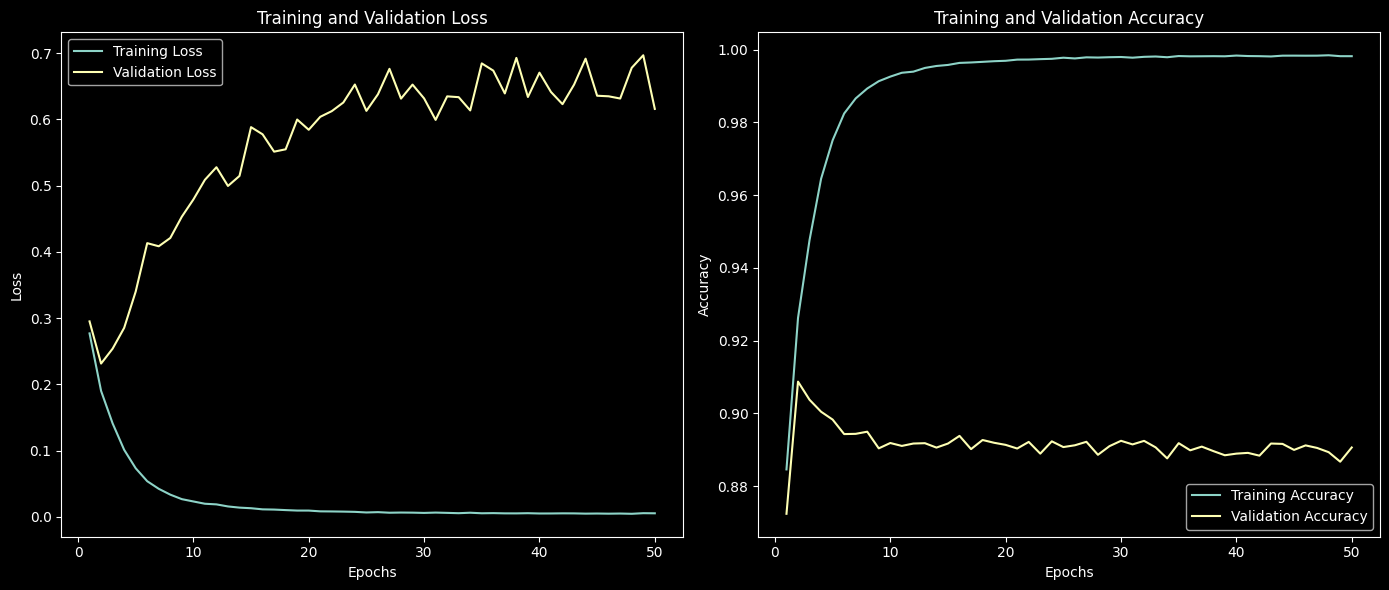

In [17]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=epochs, y=loss, label='Training Loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
sns.lineplot(x=epochs, y=accuracy, label='Training Accuracy')
sns.lineplot(x=epochs, y=val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**<a id="5"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Evaluation</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [18]:
loss,accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8917 - loss: 0.6107
Loss: 0.6068593263626099
Accuracy: 0.8913939595222473


In [19]:
prediction=model.predict(X_test)
y_pred=np.where(prediction>=.5,1,0)
df=pd.DataFrame()
df['actual'],df['pred']=y_test,y_pred
df

516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


,actual,pred
277056,1,1
108512,1,1
128547,1,1
141658,0,0
231023,1,1
...,...,...
289994,0,0
229281,0,0
46600,1,0
261799,1,1


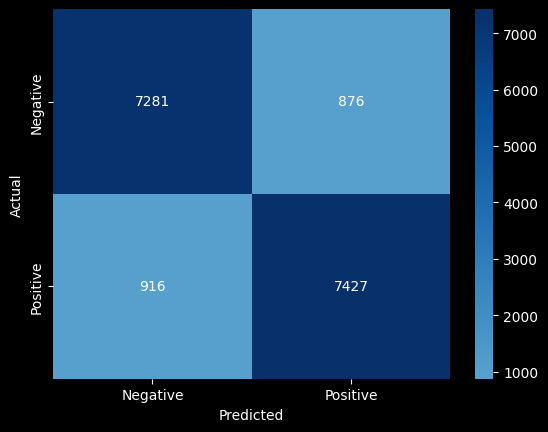

array([[7281,  876],
       [ 916, 7427]])

In [20]:
CM = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
CM

In [21]:
ClassificationReport = classification_report(y_test, y_pred, target_names=labels)
print('Classification Report is : ', ClassificationReport) 

Classification Report is :                precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      8157
    Positive       0.89      0.89      0.89      8343

    accuracy                           0.89     16500
   macro avg       0.89      0.89      0.89     16500
weighted avg       0.89      0.89      0.89     16500



**<a id="7"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">SentimentIntensityAnalyzer</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [22]:
data = dataset.copy()
sen = SentimentIntensityAnalyzer()
data['score'] = data['content'].apply(lambda text: sen.polarity_scores(text)['compound'])
data['sentiment'] = data['score'].apply(lambda x: 1 if x >= 0.5 else 0)
data.head()

,label,content,score,sentiment
0,1,النعال المريحة أرتدي هذه النعال كثيرًافهي دافئ...,0.0,0
1,1,منتج جميل ، خدمة سيئة لقد اشتريت زوجًا من النع...,0.0,0
2,1,جيد للأشياء الصغيرة هذا يعمل بشكل جيد لالتقاط ...,0.0,0
3,0,واهية للغاية للغاية ، فأنت تشتريه ، كن حذرًا ج...,0.0,0
4,1,، والأشخاص الذين يحبون الضحك عليك فقط أن تبتسم...,0.0,0


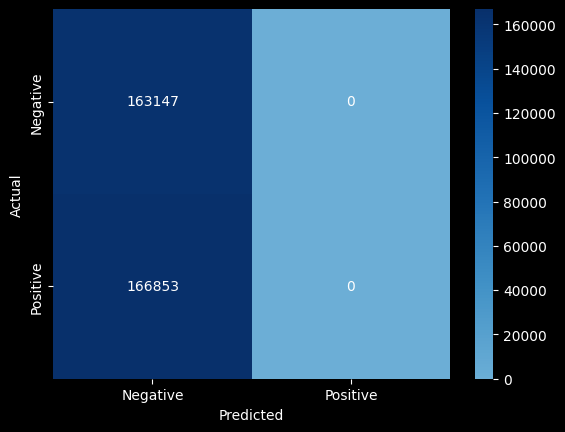

array([[163147,      0],
       [166853,      0]])

In [23]:
CM = confusion_matrix(data.label, data.sentiment)
labels = ['Negative', 'Positive']
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
CM

In [24]:
ClassificationReport = classification_report(data.label, data.sentiment, target_names=labels)
print('Classification Report is : ', ClassificationReport) 

Classification Report is :                precision    recall  f1-score   support

    Negative       0.49      1.00      0.66    163147
    Positive       0.00      0.00      0.00    166853

    accuracy                           0.49    330000
   macro avg       0.25      0.50      0.33    330000
weighted avg       0.24      0.49      0.33    330000



**<a id="6"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Like this? Upvote and comment! 🌊 End</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>